#Q2

In [11]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [12]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 76s 0us/step


In [13]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

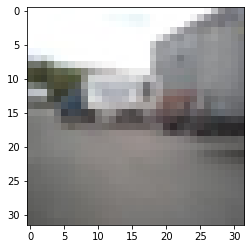

In [14]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [17]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [18]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
# Write your code here 
# Add Flatten layer and few Dense layers
fc_model.add(keras.layers.Flatten())

# Hidden Layer
# Write your code here
fc_model.add(keras.layers.Dense(128, activation='relu'))
fc_model.add(keras.layers.Dense(128, activation='relu'))
fc_model.add(keras.layers.Dense(256, activation='relu'))

# Output Layer
# Write your code here
fc_model.add(keras.layers.Dense(num_classes, activation='softmax'))
fc_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 445,450
Trainable params: 445,450
Non-trainable params: 0
_________________________________________________________________


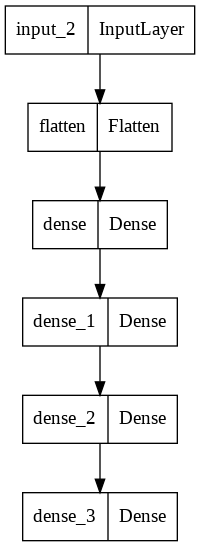

In [19]:
plot_model(fc_model)

In [20]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
# add few Conv layers and Flatten layer
# you can use pool layers after Conv layers
Conv_model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
Conv_model.add(keras.layers.MaxPool2D((2, 2)))

Conv_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
Conv_model.add(keras.layers.MaxPool2D((2, 2)))

Conv_model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
Conv_model.add(keras.layers.MaxPool2D((2, 2)))

Conv_model.add(keras.layers.Flatten())

Conv_model.add(keras.layers.Dense(256, activation='relu'))
Conv_model.add(keras.layers.Dense(num_classes, activation='softmax'))
Conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)       

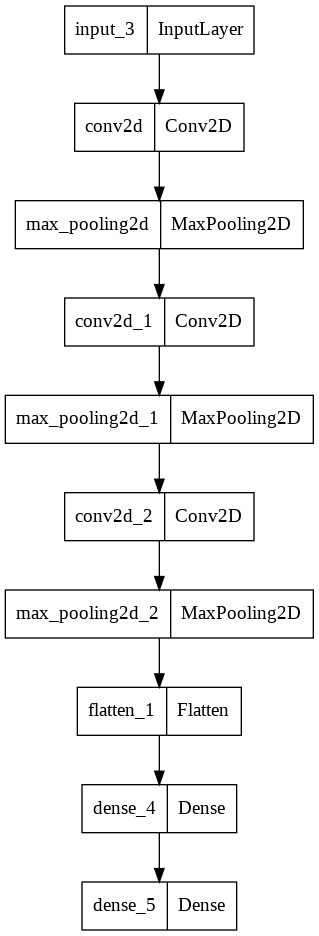

In [21]:
plot_model(Conv_model)

In [36]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=20)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8933 - accuracy: 0.3061
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7698 - accuracy: 0.3582
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7317 - accuracy: 0.3701
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7046 - accuracy: 0.3812
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6870 - accuracy: 0.3906
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6756 - accuracy: 0.3941
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6692 - accuracy: 0.3988
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6585 - accuracy: 0.4016
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6533 - accuracy: 0.3987
Epoch 10/20
1563/1563 [==============================] - 5s 

#Q3

In [15]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt

In [16]:
!rm -r sample_data

rm: cannot remove 'sample_data': No such file or directory


In [17]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:02<00:00, 260MB/s]


In [18]:
!unzip fruits-360-original-size.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_108.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_110.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_112.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_114.jpg  
  infl

## A : complete resize image

In [19]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [20]:
def resize_img(img, desired_size = 224):
    # write your code here
    w, h, _ = img.shape
    scale = desired_size / max(w, h)
    new_img = cv2.resize(img, (int(h*scale), int(w*scale)))
    w_border, h_border, _ = np.int64(np.divide(np.subtract(desired_size, new_img.shape), 2))
    w_i, h_i, _ = np.mod(new_img.shape, 2)
    new_img = cv2.copyMakeBorder(new_img, top=w_border+w_i, bottom=w_border, 
              left=h_border, right=h_border+h_i, borderType=cv2.BORDER_CONSTANT)
    # print(new_img.shape)

    return new_img

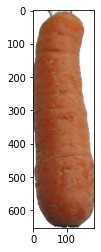

In [21]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()

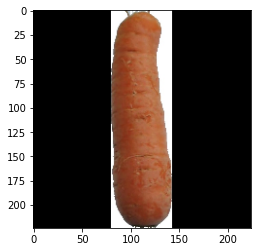

In [22]:
new_img = resize_img(img)
plt.imshow(new_img)
plt.show()

## Image Data generator

In [23]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weigts

In [24]:
# YOU CAN CHANGE IT
EPOCHS = 20

In [25]:
resnet = tf.keras.models.Sequential()
# Write your code here
resnet.add(tf.keras.applications.ResNet50(
      include_top=False,
      weights=None,
      pooling='avg'))
resnet.add(keras.layers.Flatten())
resnet.add(keras.layers.Dense(512, activation='relu'))
resnet.add(keras.layers.Dense(train_generator.num_classes, activation='softmax'))

resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 24)                12312     
                                                                 
Total params: 24,649,112
Trainable params: 24,595,992
Non-trainable params: 53,120
_________________________________________________________________


In [26]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [27]:
resnet.fit(train_generator, epochs=EPOCHS)

Epoch 1/20
65/65 [==============================] - 86s 1s/step - loss: 1.1208 - acc: 0.6829
Epoch 2/20
65/65 [==============================] - 66s 1s/step - loss: 0.2275 - acc: 0.9186
Epoch 3/20
65/65 [==============================] - 65s 998ms/step - loss: 0.1664 - acc: 0.9496
Epoch 4/20
65/65 [==============================] - 65s 998ms/step - loss: 0.1662 - acc: 0.9478
Epoch 5/20
65/65 [==============================] - 65s 1s/step - loss: 0.1107 - acc: 0.9624
Epoch 6/20
65/65 [==============================] - 65s 997ms/step - loss: 0.0517 - acc: 0.9811
Epoch 7/20
65/65 [==============================] - 65s 1000ms/step - loss: 0.0451 - acc: 0.9867
Epoch 8/20
65/65 [==============================] - 65s 998ms/step - loss: 0.0419 - acc: 0.9852
Epoch 9/20
65/65 [==============================] - 65s 999ms/step - loss: 0.0963 - acc: 0.9729
Epoch 10/20
65/65 [==============================] - 65s 1000ms/step - loss: 0.0436 - acc: 0.9889
Epoch 11/20
65/65 [===========================

## C : Fine-tune Resnet50 on fruits dataset.

In [29]:
fine_tune_resnet = tf.keras.models.Sequential()
# write your code here 
pretrained = tf.keras.applications.ResNet50(
      include_top=False,
      weights='imagenet',
      pooling='avg')
fine_tune_resnet.add(pretrained)
fine_tune_resnet.add(keras.layers.Flatten())
fine_tune_resnet.add(keras.layers.Dropout(0.5))
fine_tune_resnet.add(keras.layers.Dense(512, activation='relu'))
fine_tune_resnet.add(keras.layers.Dense(train_generator.num_classes, activation='softmax'))
pretrained.trainable = False
fine_tune_resnet.summary()


94765736/94765736 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 24)                12312     
                                                                 
Total params: 24,649,112
Trainable params: 1,061,400
Non-trainable params: 23,587,712
___________________________________

In [30]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [31]:
fine_tune_resnet.fit(train_generator, epochs=EPOCHS)

Epoch 1/20
65/65 [==============================] - 37s 525ms/step - loss: 3.0610 - acc: 0.1122
Epoch 2/20
65/65 [==============================] - 36s 552ms/step - loss: 2.4881 - acc: 0.2366
Epoch 3/20
65/65 [==============================] - 35s 536ms/step - loss: 2.0088 - acc: 0.3746
Epoch 4/20
65/65 [==============================] - 35s 529ms/step - loss: 1.7051 - acc: 0.4622
Epoch 5/20
65/65 [==============================] - 35s 535ms/step - loss: 1.4971 - acc: 0.5168
Epoch 6/20
65/65 [==============================] - 35s 541ms/step - loss: 1.3265 - acc: 0.5712
Epoch 7/20
65/65 [==============================] - 34s 525ms/step - loss: 1.1967 - acc: 0.6116
Epoch 8/20
65/65 [==============================] - 35s 538ms/step - loss: 1.0896 - acc: 0.6344
Epoch 9/20
65/65 [==============================] - 35s 533ms/step - loss: 1.0335 - acc: 0.6521
Epoch 10/20
65/65 [==============================] - 34s 522ms/step - loss: 0.9573 - acc: 0.6798
Epoch 11/20
65/65 [====================

## Test models

In [32]:
resnet.evaluate(test_generator)

33/33 [==============================] - 17s 511ms/step - loss: 3.0231 - acc: 0.5826


[3.023050546646118, 0.5826366543769836]

In [33]:
fine_tune_resnet.evaluate(test_generator)

33/33 [==============================] - 19s 543ms/step - loss: 0.4047 - acc: 0.8624


[0.4047434329986572, 0.8623794317245483]